In [2]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["marketing_campaign.csv"]))
data.head()

Saving marketing_campaign.csv to marketing_campaign.csv


ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                                                                                                                                                                                                                  
2  4141\t1965\tGraduation\tTogether\t71613\t0\t0\...                                                                                                                                                                                                                                                                                                                                                  
3  6182\t1984\tGraduation\tTogether\t26646\t1\t0\...                                                                                                                                                                                                                                                                                                                                                  
4  5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...

In [4]:
# Reload the dataset with the correct delimiter
data = pd.read_csv("/content/marketing_campaign.csv", delimiter='\t')

# Display the first few rows of the dataset for initial exploration
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()

# Summary statistics for numerical features to identify potential outliers
numerical_summary = data.describe()

# Checking the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
categorical_distribution = data[categorical_features].nunique()

missing_values, numerical_summary, categorical_distribution


(ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64,
                  ID   Year_Birth         Income      Kidhome     Teenhome  \
 count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
 mean    5592.159821  1968.805804   52247.2513

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Handling missing values for 'Income' using median
imputer = SimpleImputer(strategy='median')
data['Income'] = imputer.fit_transform(data[['Income']])

# Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Creating DataFrame for encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Removing irrelevant features
features_to_exclude = ['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
processed_data = pd.concat([data.drop(columns=features_to_exclude + list(categorical_features)), encoded_categorical_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data using Min-Max Scaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(processed_data)

# Converting the normalized data back to DataFrame
normalized_data_df = pd.DataFrame(normalized_data, columns=processed_data.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


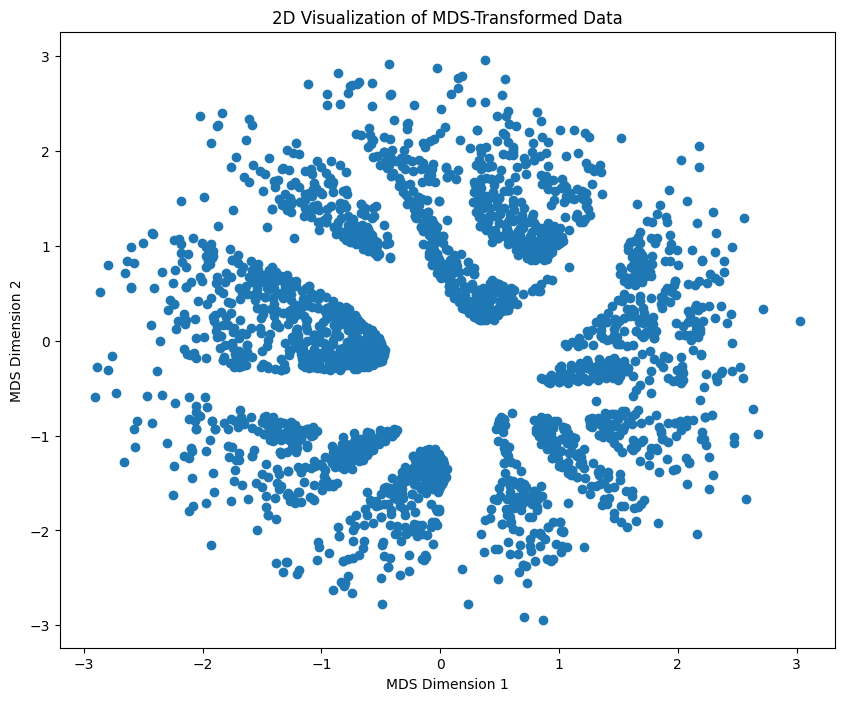

In [9]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Applying MDS with 2 components for 2D visualization
mds = MDS(n_components=2, random_state=0)
mds_transformed_data = mds.fit_transform(normalized_data_df)

# Converting MDS transformed data to DataFrame
mds_transformed_df = pd.DataFrame(mds_transformed_data, columns=['MDS1', 'MDS2'])

# 2D Visualization
plt.figure(figsize=(10, 8))
plt.scatter(mds_transformed_df['MDS1'], mds_transformed_df['MDS2'])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('2D Visualization of MDS-Transformed Data')
plt.show()


<ipython-input-10-40292a964875>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


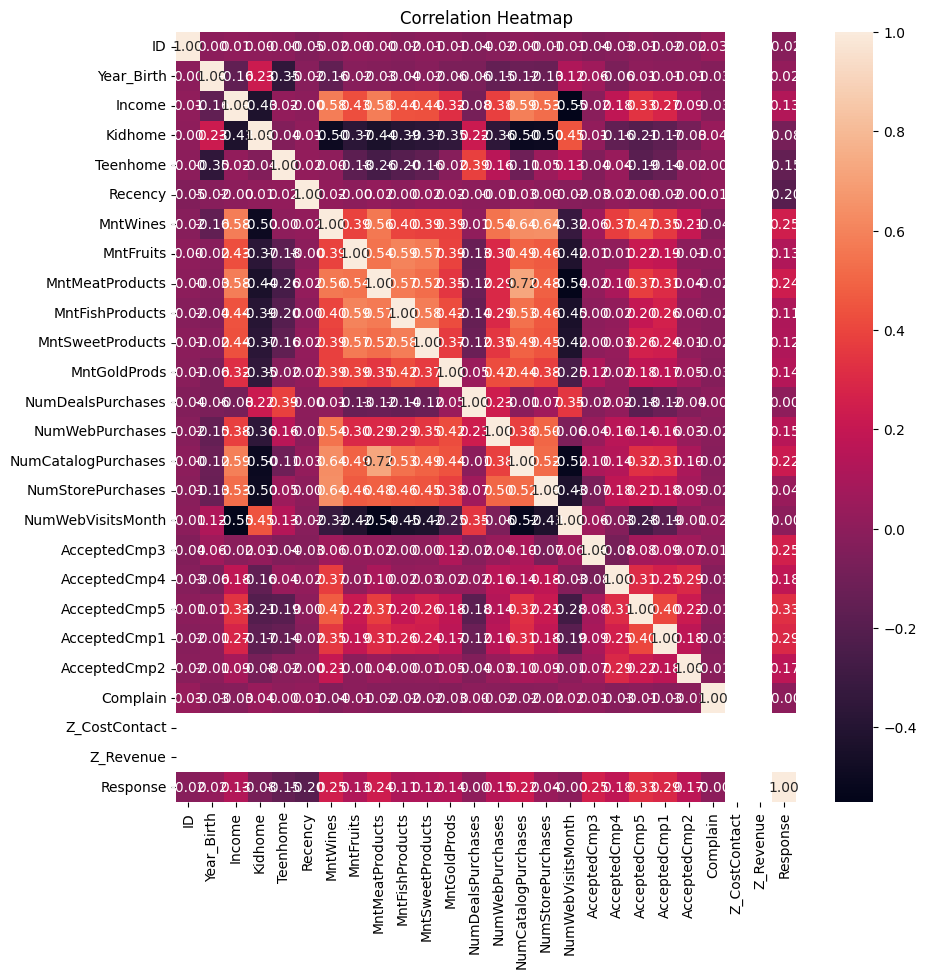

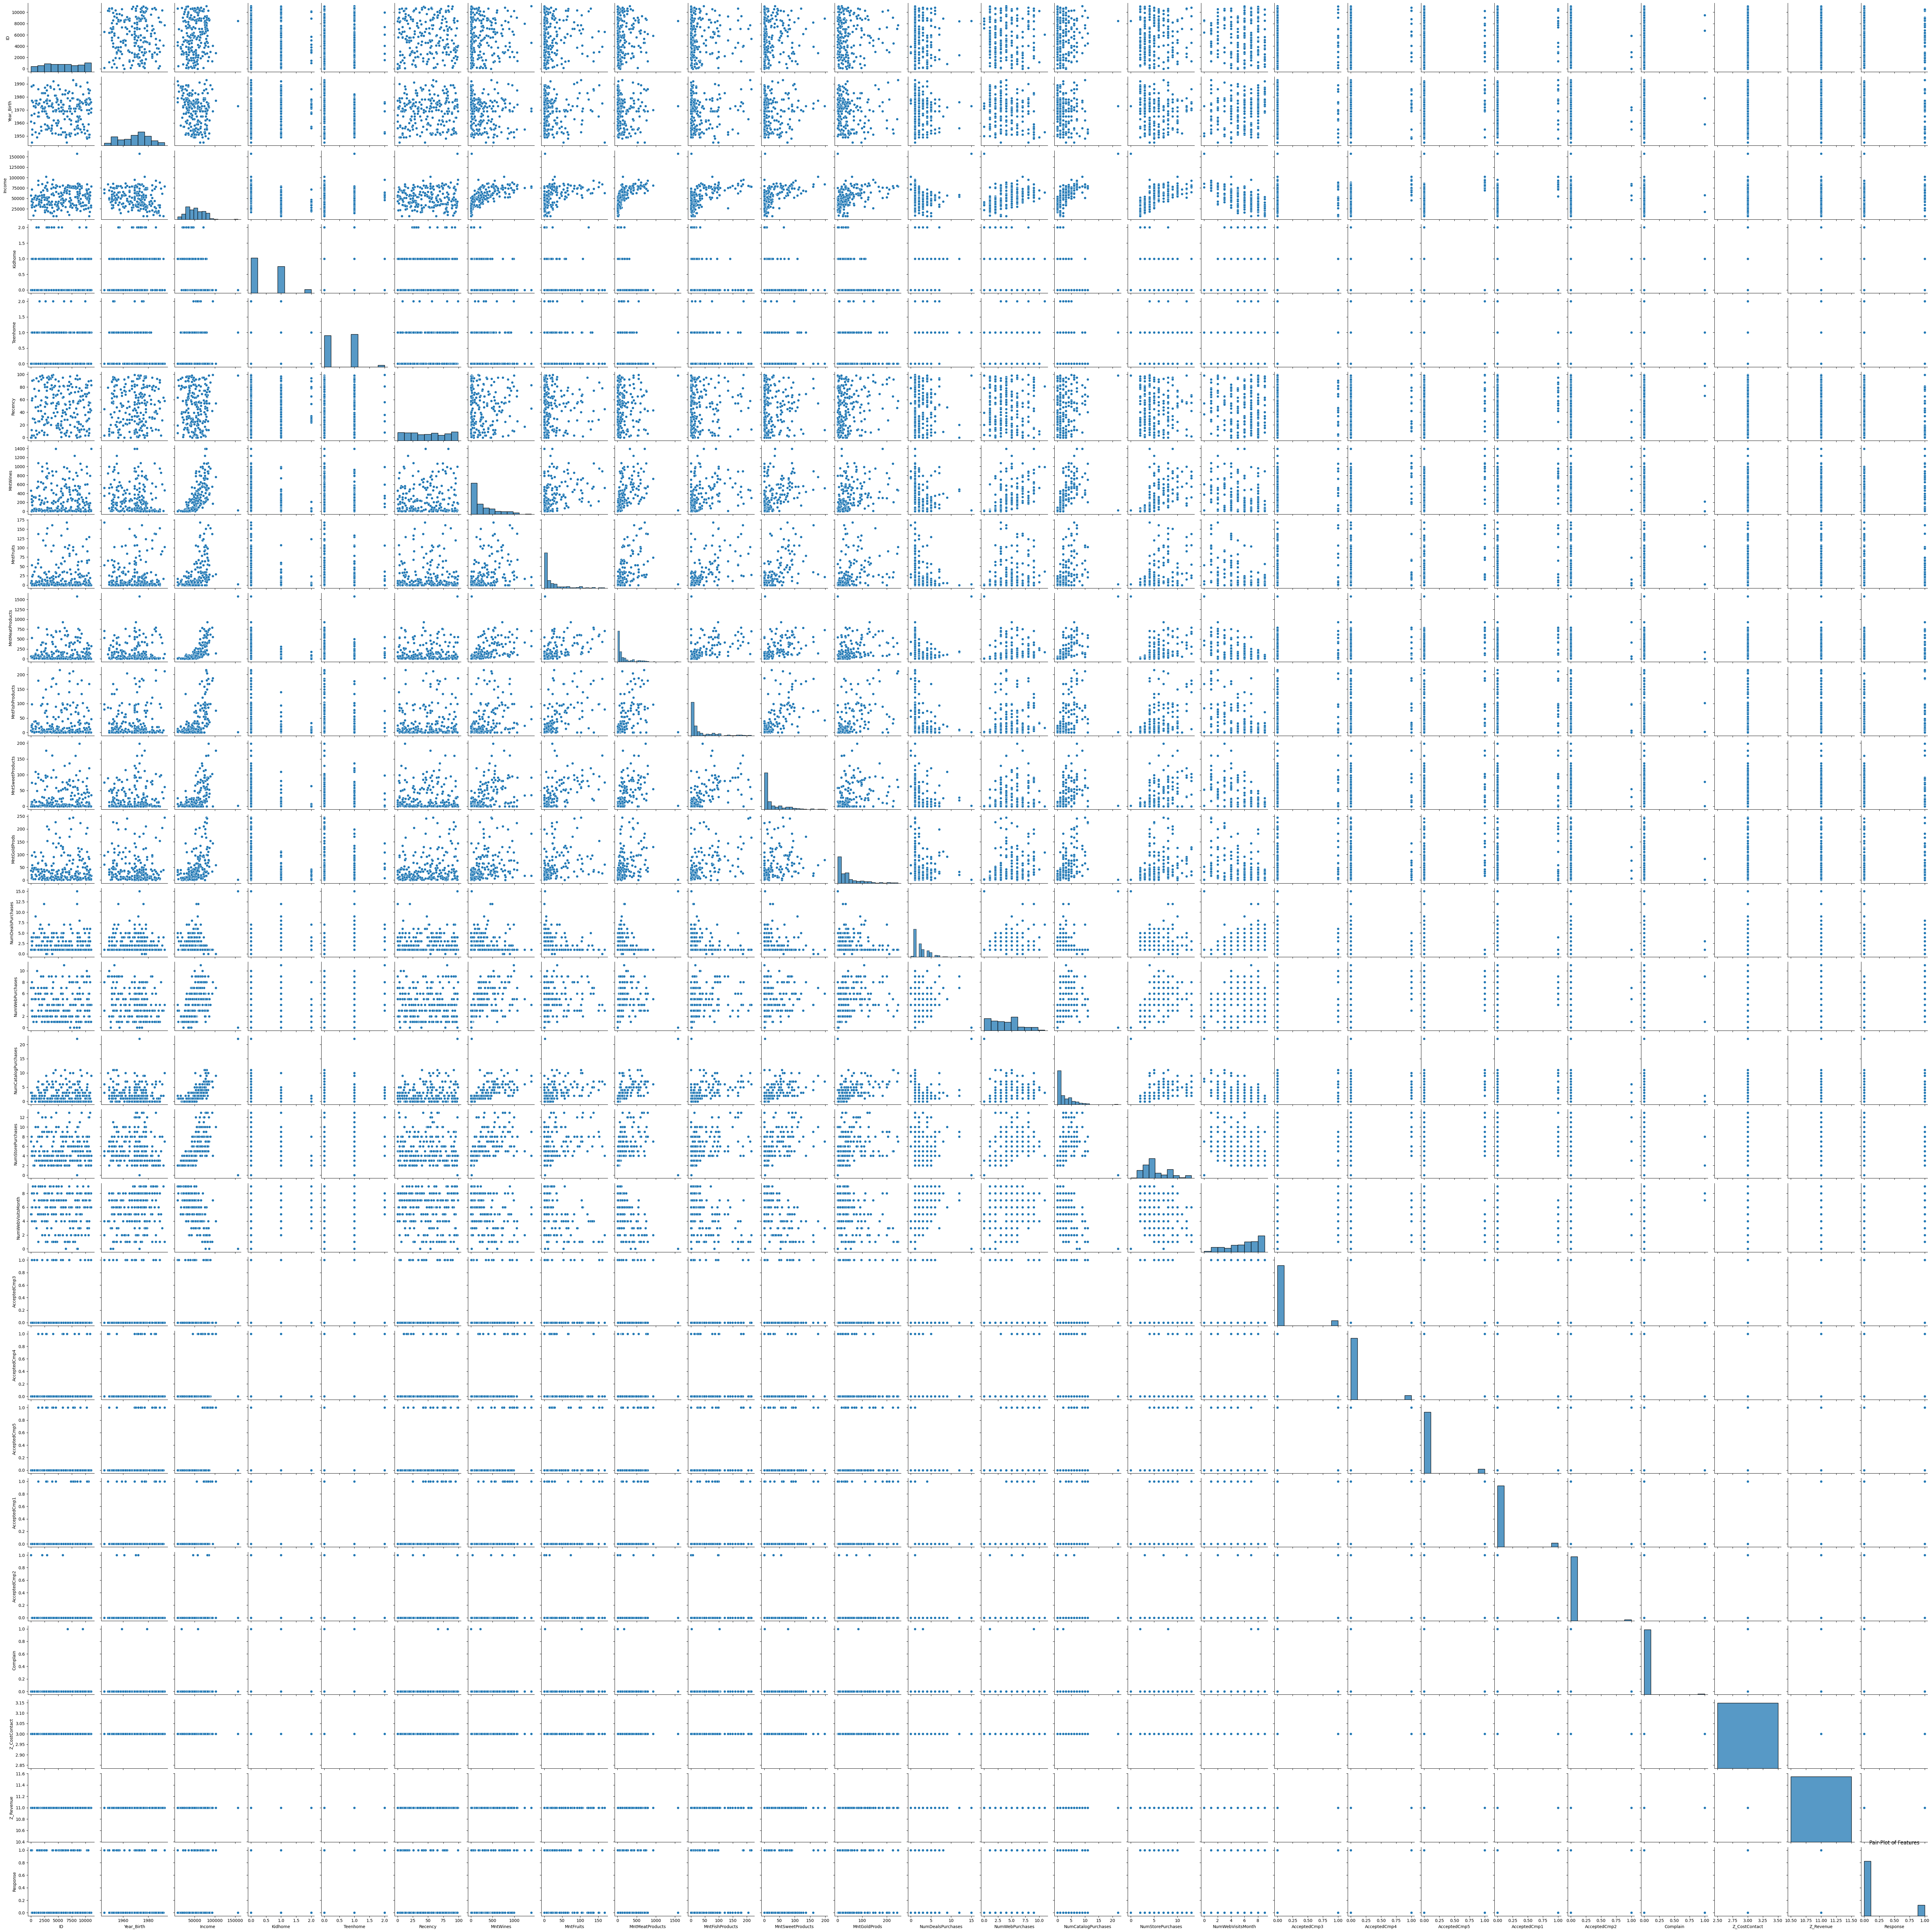

NameError: ignored

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pair Plot (use a sample if the dataset is large)
sns.pairplot(data.sample(frac=0.1))  # Adjust the fraction as needed
plt.title("Pair Plot of Features")
plt.show()


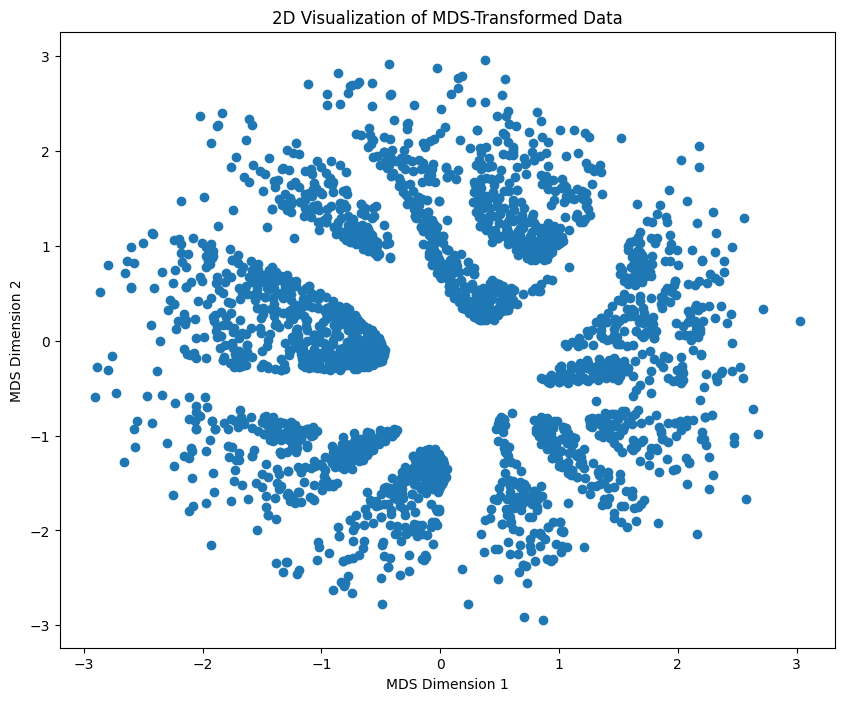

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


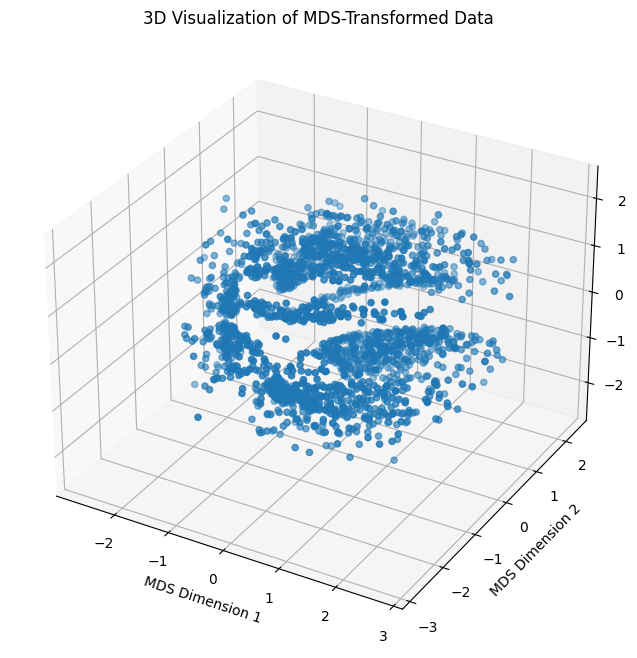

In [12]:
# 2D Scatter Plot for MDS
plt.figure(figsize=(10, 8))
plt.scatter(mds_transformed_df['MDS1'], mds_transformed_df['MDS2'])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('2D Visualization of MDS-Transformed Data')
plt.show()

# 3D Scatter Plot for MDS (if reduced to 3 dimensions)
from mpl_toolkits.mplot3d import Axes3D

mds_3d = MDS(n_components=3, random_state=0)
mds_transformed_data_3d = mds_3d.fit_transform(normalized_data_df)

mds_transformed_df_3d = pd.DataFrame(mds_transformed_data_3d, columns=['MDS1', 'MDS2', 'MDS3'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mds_transformed_df_3d['MDS1'], mds_transformed_df_3d['MDS2'], mds_transformed_df_3d['MDS3'])
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.title('3D Visualization of MDS-Transformed Data')
plt.show()


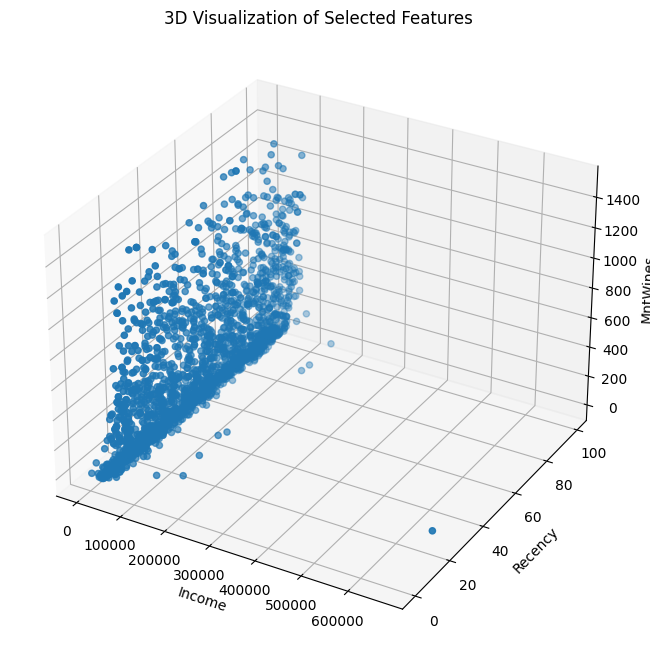

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Select three numerical features for 3D visualization
features = ['Income', 'Recency', 'MntWines']  # Replace with your actual feature names

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[features[0]], data[features[1]], data[features[2]])
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.title('3D Visualization of Selected Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


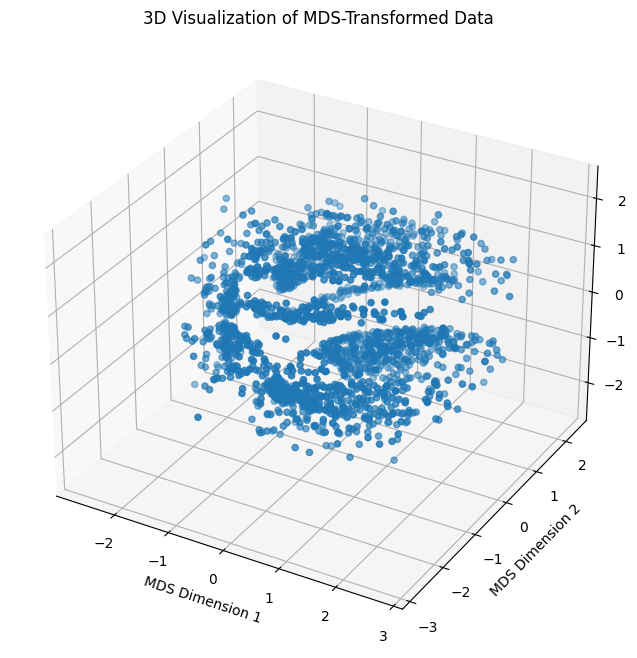

In [15]:
# Applying MDS with 3 components for 3D visualization
mds_3d = MDS(n_components=3, random_state=0)
mds_transformed_data_3d = mds_3d.fit_transform(normalized_data_df)

# Plotting the results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mds_transformed_data_3d[:, 0], mds_transformed_data_3d[:, 1], mds_transformed_data_3d[:, 2])
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.title('3D Visualization of MDS-Transformed Data')
plt.show()
